### Lab 1: Hybrid mergesort with insertion sort ###


In [41]:
def insertion_sort(arr,key_comparisons):
    if len(arr)<= 1:
        return arr, key_comparisons
    for i in range(1, len(arr)):
        for j in range(i,0,-1):
            key_comparisons += 1
            if arr[j]< arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
            else:
                break
        
    return arr, key_comparisons

In [42]:
def merge(left, right, key_comparisons):
    result = []
    leftl = len(left)
    rightl = len(right)
    i,j = 0,0 
    while i<leftl and j < rightl:
        if left[i] < right[j]:
            result.append(left[i])
            i+= 1
        else:
            result.append(right[j])
            j+= 1
        key_comparisons += 1
    if i < leftl:
        result.extend(left[i:])
    if j < rightl:
        result.extend(right[j:])
    
    return result, key_comparisons

In [43]:
def mergesort_hybrid(arr, threshold, key_comparisons):
    N = len(arr)
    #Base case
    if N <= threshold:
        return insertion_sort(arr, key_comparisons)
    mid = N//2
    left,key_compL = mergesort_hybrid(arr[:mid], threshold, key_comparisons)
    right, key_compR = mergesort_hybrid(arr[mid:], threshold, key_comparisons)

    return merge(left, right, key_comparisons + key_compR + key_compL)


In [51]:
import random
sizes = [1000, 50000, 250000, 500000, 1000000, 5000000, 10000000]
test_arrays = {}
for size in sizes:
    test_arrays[size] = random.sample(range(1, size + 1), size)

# Measure comparisons for each size
results = {}
times = {}

In [52]:
import time
S = 10
for size in sizes:
    print(f"Testing size: {size:,}")
    
    comparison_count = 0
    
    arr_copy = test_arrays[size].copy()
    
    start_time = time.time()
    sorted_arr, comparison_count = mergesort_hybrid(arr_copy, S, 0)
    end_time = time.time()
    
    results[size] = comparison_count
    times[size] = end_time - start_time
    
    print(f"  Comparisons: {comparison_count:,}")
    print(f"  Time: {end_time - start_time:.4f} seconds")

Testing size: 1,000
  Comparisons: 9,084
  Time: 0.0314 seconds
Testing size: 50,000
  Comparisons: 729,212
  Time: 0.4161 seconds
Testing size: 250,000
  Comparisons: 4,267,713
  Time: 1.6099 seconds
Testing size: 500,000
  Comparisons: 9,036,946
  Time: 3.2863 seconds
Testing size: 1,000,000
  Comparisons: 19,071,316
  Time: 7.2952 seconds
Testing size: 5,000,000
  Comparisons: 108,205,410
  Time: 45.7044 seconds
Testing size: 10,000,000
  Comparisons: 226,416,202
  Time: 97.0877 seconds


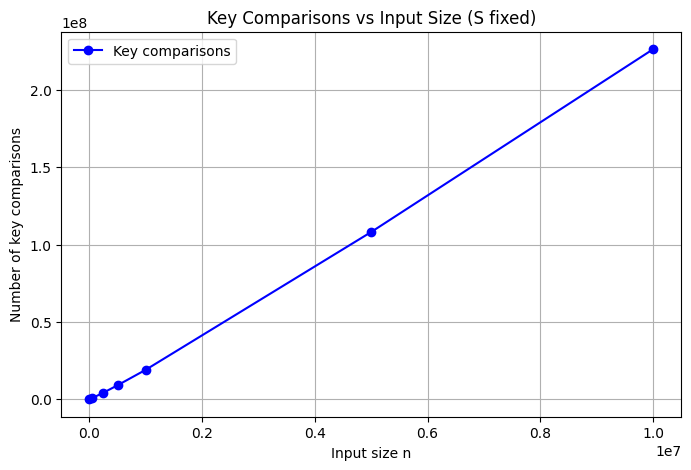

In [53]:
import matplotlib.pyplot as plt

x = list(results.keys())
y = list(results.values())

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Key comparisons")

plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Key Comparisons vs Input Size (S fixed)")
plt.legend()
plt.grid(True)
plt.show()

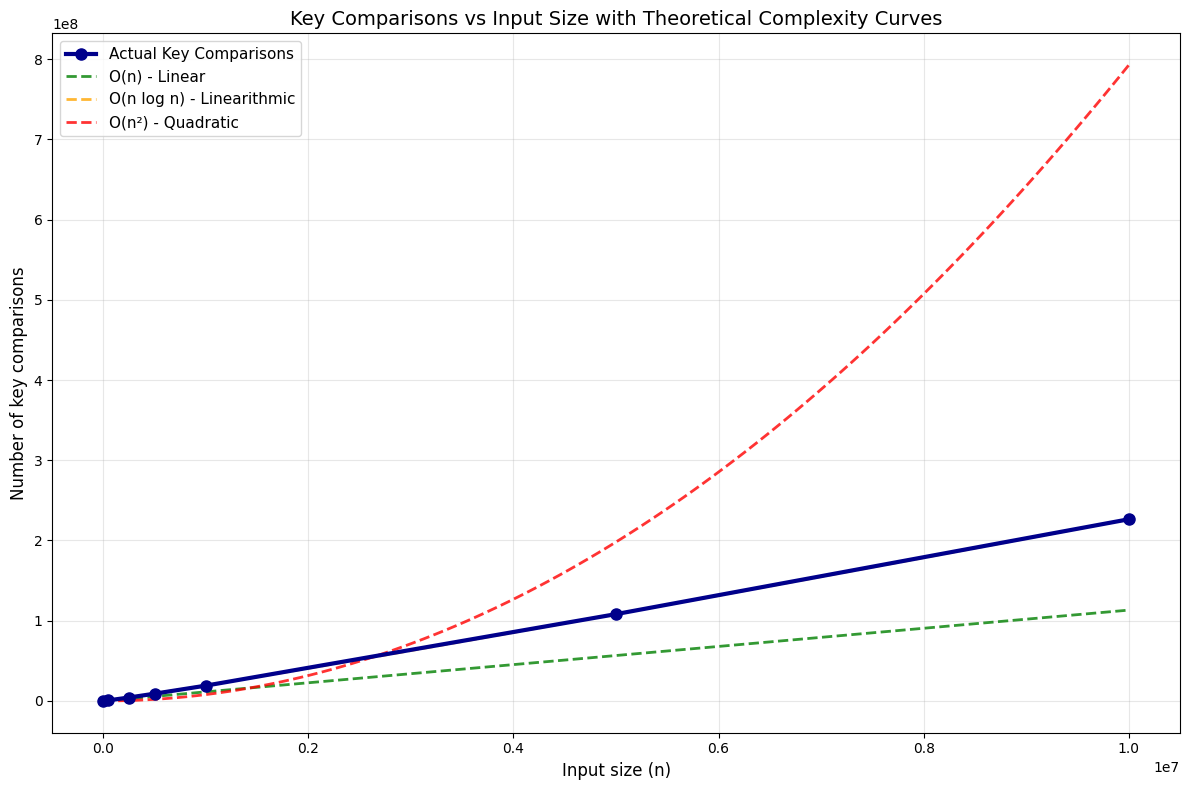

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = list(results.keys())
y = list(results.values())

x_theory = np.linspace(min(x), max(x), 100)

max_n = max(x)
max_comparisons = max(y)

# O(n)
y_linear = x_theory
linear_scale = max_comparisons / (2 * max_n)  # Scale to be visible
y_linear_scaled = y_linear * linear_scale

# O(n log n)
y_nlogn = x_theory * np.log2(x_theory)
nlogn_scale = max_comparisons / (max_n * np.log2(max_n))
y_nlogn_scaled = y_nlogn * nlogn_scale

# O(n²)
y_quadratic = x_theory ** 2
quad_scale = max_comparisons / (max_n ** 2) * 3.5  # Multiply by 3.5 to make it cut earlier
y_quadratic_scaled = y_quadratic * quad_scale

plt.figure(figsize=(12, 8))

# Plot actual data 
plt.plot(x, y, marker='o', linestyle='-', linewidth=3, markersize=8, 
         color='darkblue', label="Actual Key Comparisons", zorder=5)

# Plot theoretical complexity curves
plt.plot(x_theory, y_linear_scaled, linestyle='--', linewidth=2, 
         color='green', label="O(n) - Linear", alpha=0.8)
plt.plot(x_theory, y_nlogn_scaled, linestyle='--', linewidth=2, 
         color='orange', label="O(n log n) - Linearithmic", alpha=0.8)
plt.plot(x_theory, y_quadratic_scaled, linestyle='--', linewidth=2, 
         color='red', label="O(n²) - Quadratic", alpha=0.8)

# Enhance the plot appearance
plt.xlabel("Input size (n)", fontsize=12)
plt.ylabel("Number of key comparisons", fontsize=12)
plt.title("Key Comparisons vs Input Size with Theoretical Complexity Curves", fontsize=14)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


In [ ]:
import time
S = [5, 10, 15, 20, 50, 100]
results_s = {}
for s in S:
    print(f"Testing S: {s}")
    
    comparison_count = 0
    
    arr_copy = test_arrays[250000].copy()
    
    start_time = time.time()
    sorted_arr, comparison_count = mergesort_hybrid(arr_copy, s, 0)
    end_time = time.time()
    
    results_s[s] = comparison_count
    
    print(f"  Comparisons: {comparison_count:,}")
    print(f"  Time: {end_time - start_time:.4f} seconds")

Testing S: 5
  Comparisons: 4,181,864
  Time: 1.9999 seconds
Testing S: 10
  Comparisons: 4,267,713
  Time: 1.6592 seconds
Testing S: 15
  Comparisons: 4,471,969
  Time: 1.6326 seconds
Testing S: 20
  Comparisons: 4,556,171
  Time: 1.7671 seconds
Testing S: 50
  Comparisons: 5,296,759
  Time: 1.8456 seconds
Testing S: 100
  Comparisons: 6,972,307
  Time: 2.1937 seconds


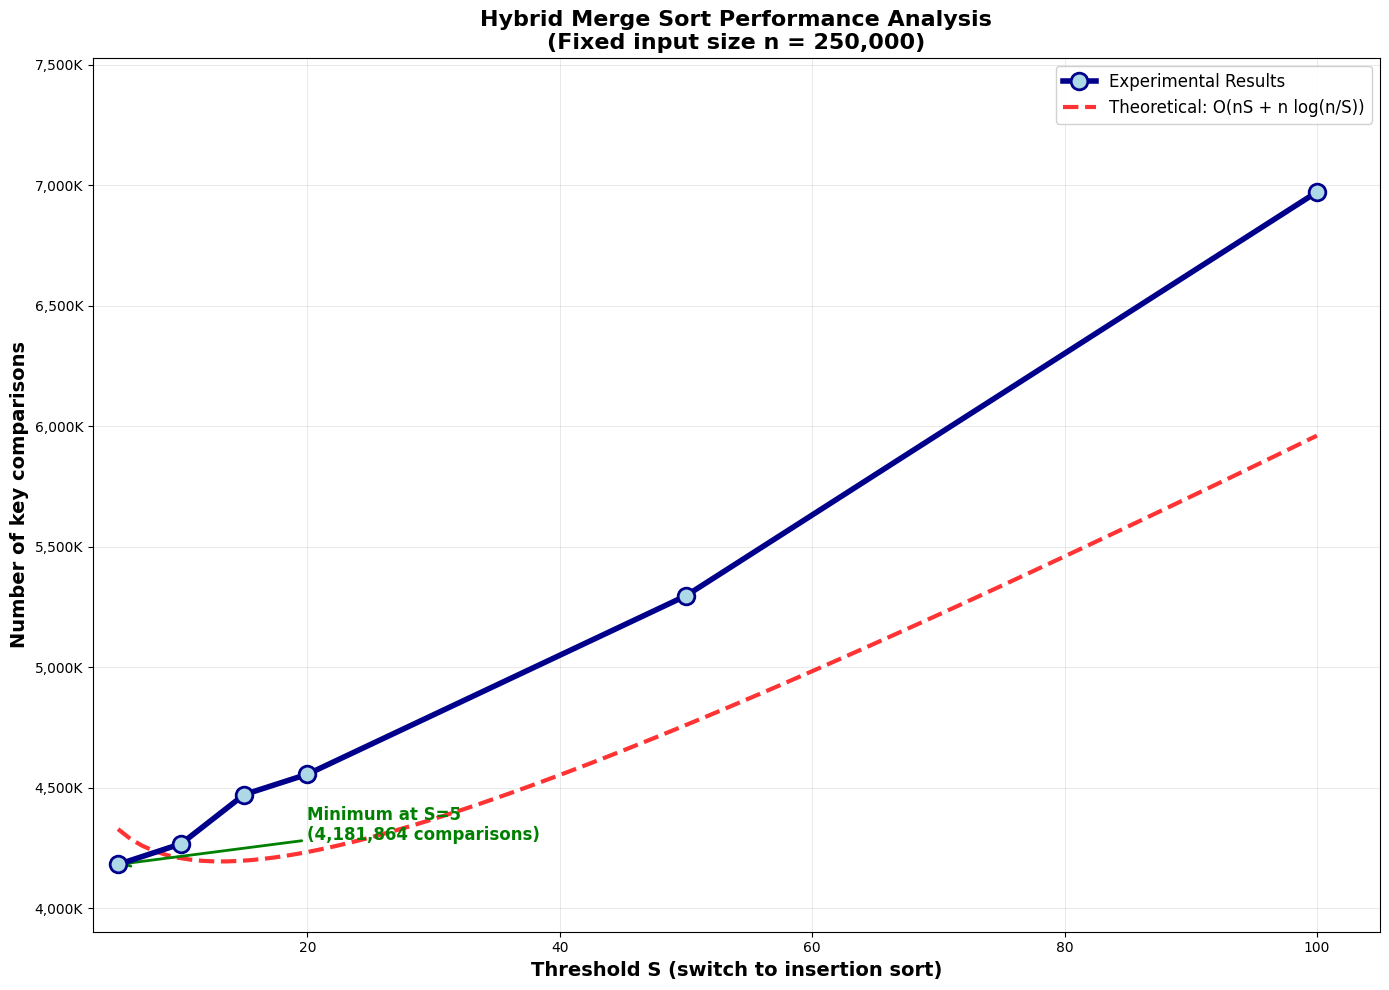

HYBRID MERGE SORT ANALYSIS
Fixed input size (n): 250,000
Threshold values tested: [5, 10, 15, 20, 50, 100]

Experimental Results:
S =   5: 4,181,864 comparisons
S =  10: 4,267,713 comparisons
S =  15: 4,471,969 comparisons
S =  20: 4,556,171 comparisons
S =  50: 5,296,759 comparisons
S = 100: 6,972,307 comparisons

Optimal threshold: S = 5
Minimum comparisons: 4,181,864
Performance variation: 66.7% difference between best and worst


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your experimental data
S = [5, 10, 15, 20, 50, 100]
x = S
y = list(results_s.values())

# Create theoretical analysis curves
S_theory = np.linspace(min(S), max(S), 100)
n = 250000  # Your fixed input size

# Theoretical hybrid merge sort complexity: O(nS + n*log(n/S))
# Adjust these constants based on your data range for visualization
max_comparisons = max(y)
min_comparisons = min(y)

# Estimate constants to fit your data scale
c1 = (max_comparisons - min_comparisons) / (n * (max(S) - min(S)))  # For nS component
c2 = min_comparisons / (n * np.log2(n / min(S)))  # For n*log(n/S) component

theoretical_comparisons = c1 * n * S_theory + c2 * n * np.log2(n / S_theory)

# Create the enhanced plot
plt.figure(figsize=(14, 10))

# Plot your actual experimental data (prominent)
plt.plot(x, y, marker='o', linestyle='-', linewidth=4, markersize=12, 
         color='darkblue', label="Experimental Results", zorder=5, markerfacecolor='lightblue', markeredgewidth=2)

# Plot theoretical curve
plt.plot(S_theory, theoretical_comparisons, linestyle='--', linewidth=3, 
         color='red', label="Theoretical: O(nS + n log(n/S))", alpha=0.8)

# Add annotations for key insights
optimal_S = x[y.index(min(y))]
plt.annotate(f'Minimum at S={optimal_S}\n({min(y):,} comparisons)', 
             xy=(optimal_S, min(y)), xytext=(optimal_S+15, min(y)+100000),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=12, color='green', fontweight='bold')

# Enhanced styling
plt.xlabel("Threshold S (switch to insertion sort)", fontsize=14, fontweight='bold')
plt.ylabel("Number of key comparisons", fontsize=14, fontweight='bold')
plt.title(f"Hybrid Merge Sort Performance Analysis\n(Fixed input size n = {n:,})", 
          fontsize=16, fontweight='bold')

# Format y-axis for better readability
plt.ticklabel_format(style='plain', axis='y')
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{int(tick/1000):,}K' for tick in y_ticks])

# Add grid and legend
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)

# Set reasonable axis limits
plt.xlim(min(S) - 2, max(S) + 5)
comparison_range = max(y) - min(y)
plt.ylim(min(y) - comparison_range*0.1, max(y) + comparison_range*0.2)

plt.tight_layout()
plt.show()

# Print analysis
print("HYBRID MERGE SORT ANALYSIS")
print("=" * 50)
print(f"Fixed input size (n): {n:,}")
print(f"Threshold values tested: {S}")
print("\nExperimental Results:")
for s, comparisons in zip(x, y):
    print(f"S = {s:3d}: {comparisons:,} comparisons")

print(f"\nOptimal threshold: S = {optimal_S}")
print(f"Minimum comparisons: {min(y):,}")


In [ ]:
import time
from collections import defaultdict

# Define the parameters  
sizes = [1000, 50000, 250000, 500000, 1000000]
S = [5, 10, 15, 20, 50, 100]

# Initialize the results structure
results_by_size = {}
timing_results = {}  # Optional: also track execution times

print("COMPREHENSIVE HYBRID MERGE SORT TESTING")
print("=" * 55)
print(f"Testing {len(sizes)} input sizes × {len(S)} threshold values = {len(sizes) * len(S)} total experiments")
print()

# Main data collection loop
for n in sizes:
    print(f"🔄 TESTING INPUT SIZE: {n:,}")
    print("-" * 40)
    
    # Initialize dictionaries for this input size
    results_by_size[n] = {}
    timing_results[n] = {}
    
    # Get the test array for this size
    arr_copy = test_arrays[n].copy()  # Make sure you have test_arrays[n] available
    
    for s in S:
        print(f"  Testing S: {s:2d} ", end="")
        
        # Make a fresh copy for each test
        test_arr = arr_copy.copy()
        
        # Run the hybrid merge sort
        start_time = time.time()
        sorted_arr, comparison_count = mergesort_hybrid(test_arr, s, 0)
        end_time = time.time()
        
        execution_time = end_time - start_time
        
        # Store results
        results_by_size[n][s] = comparison_count
        timing_results[n][s] = execution_time
        
        print(f"→ {comparison_count:8,} comparisons, {execution_time:.4f}s")
    
    # Find optimal S for this input size
    best_s = min(results_by_size[n], key=results_by_size[n].get)
    best_comparisons = results_by_size[n][best_s]
    
    print(f"  ✅ Best for n={n:,}: S={best_s} ({best_comparisons:,} comparisons)")
    print()

print("🎉 DATA COLLECTION COMPLETE!")
print("=" * 30)

# Display summary
print("\nSUMMARY OF RESULTS:")
print("Input Size    | Optimal S | Min Comparisons")
print("-" * 45)
for n in sizes:
    best_s = min(results_by_size[n], key=results_by_size[n].get)
    best_comparisons = results_by_size[n][best_s]
    print(f"{n:9,} | {best_s:8d} | {best_comparisons:13,}")

# Optional: Save results to file for later use
print(f"\nResults structure created: results_by_size")
print(f"Available sizes: {list(results_by_size.keys())}")
print(f"Available S values: {S}")

COMPREHENSIVE HYBRID MERGE SORT TESTING
Testing 5 input sizes × 6 threshold values = 30 total experiments

🔄 TESTING INPUT SIZE: 1,000
----------------------------------------
  Testing S:  5 →    8,729 comparisons, 0.0123s
  Testing S: 10 →    9,084 comparisons, 0.0025s
  Testing S: 15 →    9,473 comparisons, 0.0000s
  Testing S: 20 →   10,200 comparisons, 0.0060s
  Testing S: 50 →   13,277 comparisons, 0.0081s
  Testing S: 100 →   20,388 comparisons, 0.0000s
  ✅ Best for n=1,000: S=5 (8,729 comparisons)

🔄 TESTING INPUT SIZE: 50,000
----------------------------------------
  Testing S:  5 →  718,552 comparisons, 0.2757s
  Testing S: 10 →  729,212 comparisons, 0.2391s
  Testing S: 15 →  770,573 comparisons, 0.2353s
  Testing S: 20 →  770,573 comparisons, 0.2256s
  Testing S: 50 → 1,144,128 comparisons, 0.3315s
  Testing S: 100 → 1,709,902 comparisons, 0.4539s
  ✅ Best for n=50,000: S=5 (718,552 comparisons)

🔄 TESTING INPUT SIZE: 250,000
----------------------------------------
  Test

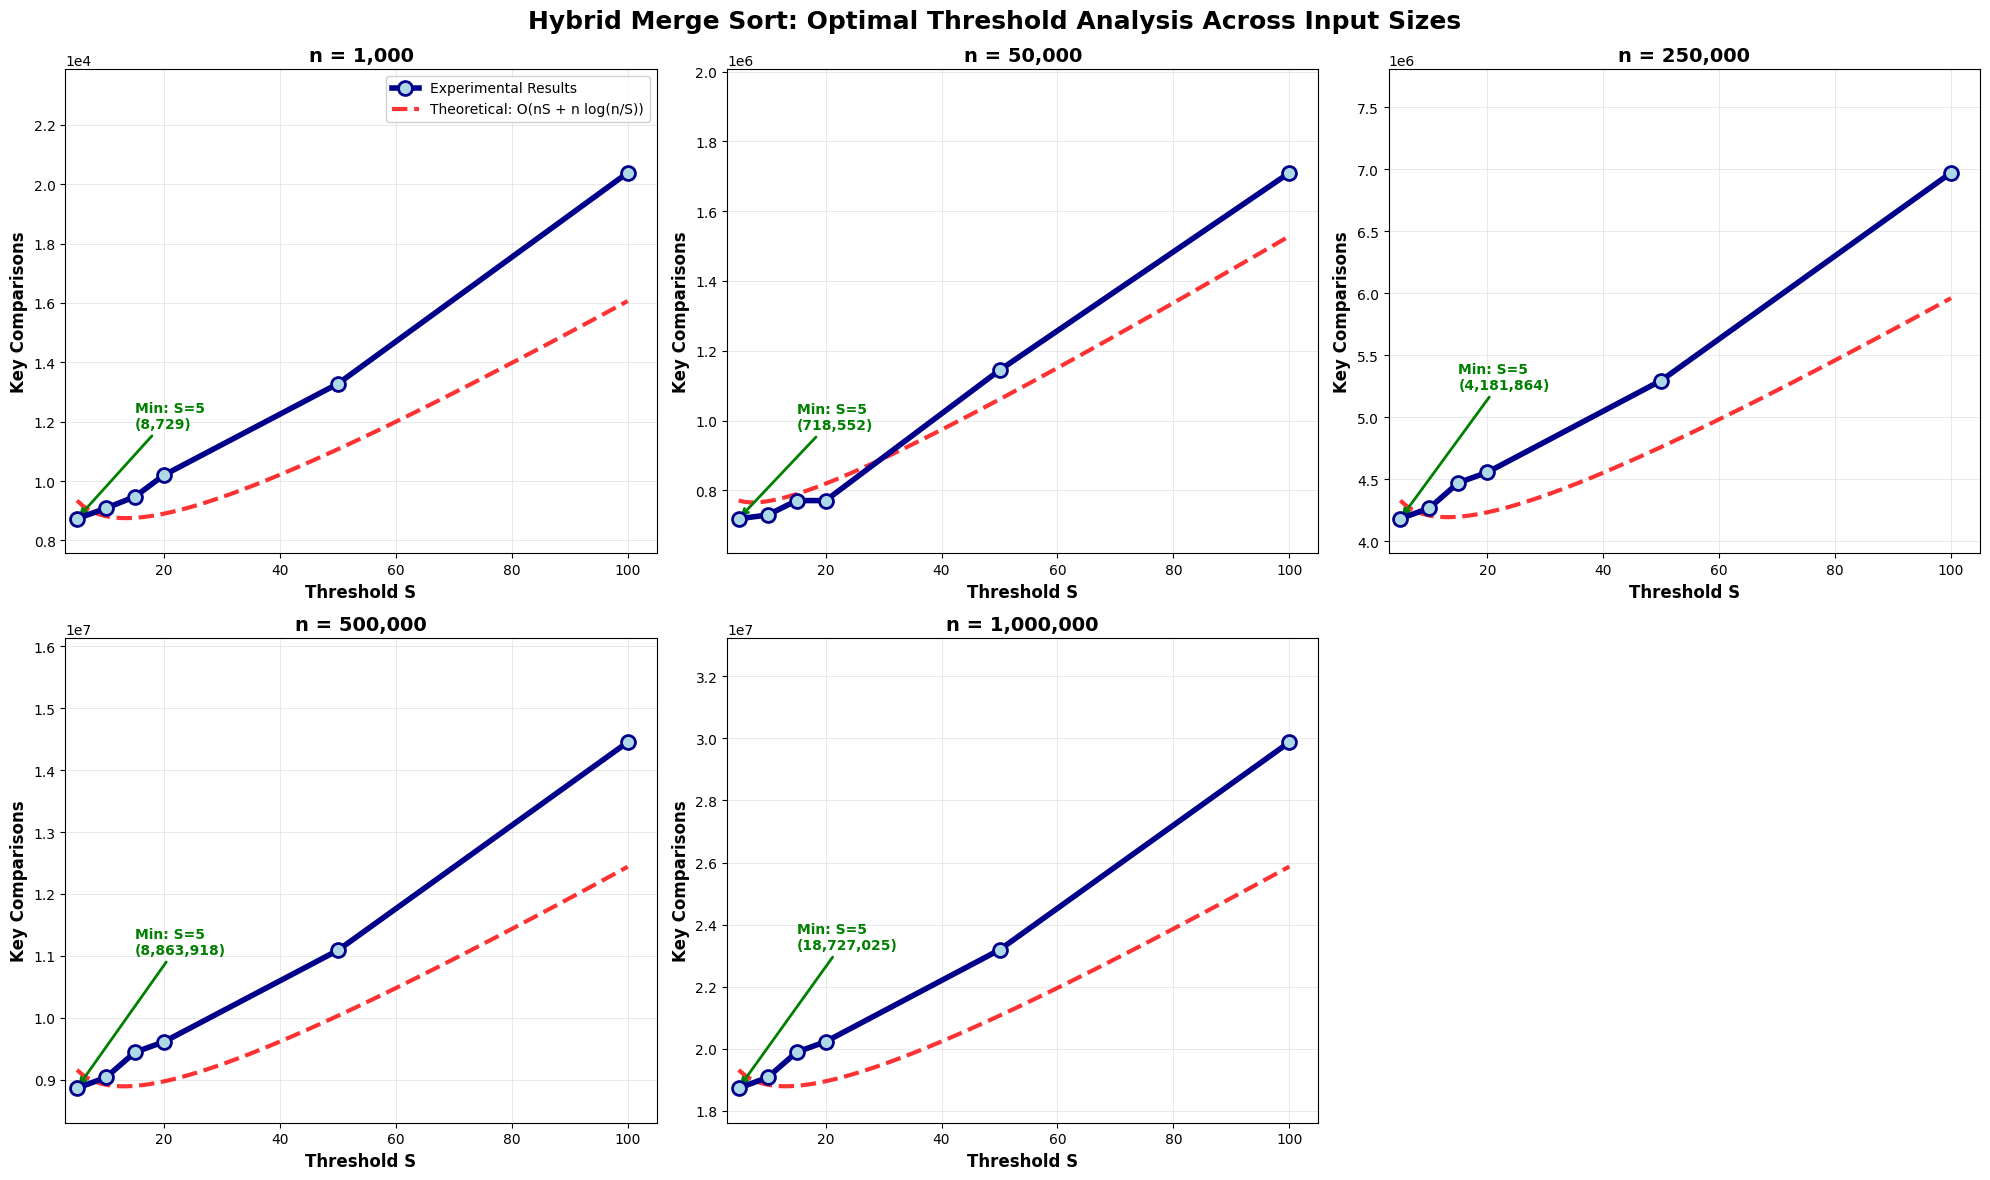

COMPREHENSIVE HYBRID MERGE SORT ANALYSIS
Optimal S values across different input sizes:

Input Size    | Optimal S | Min Comparisons | Max Comparisons | Improvement
---------------------------------------------------------------------------
    1,000 |        5 |          8,729 |         20,388 |     57.2%
   50,000 |        5 |        718,552 |      1,709,902 |     58.0%
  250,000 |        5 |      4,181,864 |      6,972,307 |     40.0%
  500,000 |        5 |      8,863,918 |     14,452,102 |     38.7%
1,000,000 |        5 |     18,727,025 |     29,878,706 |     37.3%

Analysis Summary:
Optimal S trend: stable
Range: 5 - 5
Average optimal S: 5.0
Standard deviation: 0.0

Performance Improvements:
Average improvement by choosing optimal S: 46.2%
Best improvement: 58.0%
Worst improvement: 37.3%


In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Multiple input sizes instead of fixed n
sizes = [1000, 50000, 250000, 500000, 1000000]
S = [5, 10, 15, 20, 50, 100]

# Verify that results_by_size exists and has the required data
if 'results_by_size' not in globals():
    print("ERROR: results_by_size not found!")
    print("Please run the data collection code first to generate results_by_size")
    exit()

# Create subplot layout for multiple input sizes
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

optimal_s_results = {}  # Store optimal S for each size
performance_metrics = {}  # Store additional metrics

for idx, n in enumerate(sizes):
    # Check if data exists for this input size
    if n not in results_by_size:
        print(f"Warning: No data found for input size {n:,}")
        continue
    
    # Extract your actual experimental data
    x = S
    y = []
    
    # Get actual comparison counts from your results
    for s in S:
        if s in results_by_size[n]:
            y.append(results_by_size[n][s])
        else:
            print(f"Warning: Missing data for n={n:,}, S={s}")
            y.append(None)  # Handle missing data
    
    # Filter out None values for plotting
    valid_data = [(s, comp) for s, comp in zip(x, y) if comp is not None]
    if not valid_data:
        print(f"No valid data for input size {n:,}")
        continue
    
    x_valid, y_valid = zip(*valid_data)
    x_valid = list(x_valid)
    y_valid = list(y_valid)
    
    # Create theoretical analysis curves
    S_theory = np.linspace(min(x_valid), max(x_valid), 100)
    
    # Theoretical hybrid merge sort complexity: O(nS + n*log(n/S))
    max_comparisons = max(y_valid)
    min_comparisons = min(y_valid)
    
    # Estimate constants to fit your actual data scale
    if max_comparisons != min_comparisons:  # Avoid division by zero
        c1 = (max_comparisons - min_comparisons) / (n * (max(x_valid) - min(x_valid)))
        c2 = min_comparisons / (n * np.log2(n / min(x_valid)))
        
        theoretical_comparisons = c1 * n * S_theory + c2 * n * np.log2(n / S_theory)
    else:
        # Fallback if all values are the same
        theoretical_comparisons = np.full_like(S_theory, min_comparisons)
    
    # Plot on the specific subplot
    ax = axes[idx]
    
    # Plot experimental data (prominent)
    ax.plot(x_valid, y_valid, marker='o', linestyle='-', linewidth=4, markersize=10, 
            color='darkblue', label="Experimental Results", zorder=5, 
            markerfacecolor='lightblue', markeredgewidth=2)
    
    # Plot theoretical curve
    ax.plot(S_theory, theoretical_comparisons, linestyle='--', linewidth=3, 
            color='red', label="Theoretical: O(nS + n log(n/S))", alpha=0.8)
    
    # Find and annotate optimal S
    optimal_S = x_valid[y_valid.index(min(y_valid))]
    optimal_s_results[n] = optimal_S
    
    # Store performance metrics
    performance_metrics[n] = {
        'optimal_s': optimal_S,
        'min_comparisons': min(y_valid),
        'max_comparisons': max(y_valid),
        'improvement': (max(y_valid) - min(y_valid)) / max(y_valid) * 100,
        'comparison_range': max(y_valid) - min(y_valid)
    }
    
    ax.annotate(f'Min: S={optimal_S}\n({min(y_valid):,})', 
                xy=(optimal_S, min(y_valid)), xytext=(optimal_S+10, min(y_valid)+max(y_valid)*0.15),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, color='green', fontweight='bold')
    
    # Enhanced styling for each subplot
    ax.set_xlabel("Threshold S", fontsize=12, fontweight='bold')
    ax.set_ylabel("Key Comparisons", fontsize=12, fontweight='bold')
    ax.set_title(f"n = {n:,}", fontsize=14, fontweight='bold')
    
    # Format y-axis for better readability
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Add grid and legend
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    if idx == 0:  # Only show legend on first subplot to avoid clutter
        ax.legend(fontsize=10, loc='upper right', framealpha=0.9)
    
    # Set reasonable axis limits
    ax.set_xlim(min(x_valid) - 2, max(x_valid) + 5)
    comparison_range = max(y_valid) - min(y_valid)
    if comparison_range > 0:
        ax.set_ylim(min(y_valid) - comparison_range*0.1, max(y_valid) + comparison_range*0.3)

# Remove the empty 6th subplot
if len(sizes) < 6:
    fig.delaxes(axes[5])

# Add overall title
fig.suptitle("Hybrid Merge Sort: Optimal Threshold Analysis Across Input Sizes", 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Make room for the main title
plt.show()

# Print comprehensive analysis with actual data
print("COMPREHENSIVE HYBRID MERGE SORT ANALYSIS")
print("=" * 60)
print("Optimal S values across different input sizes:")
print()

# Enhanced analysis table
print("Input Size    | Optimal S | Min Comparisons | Max Comparisons | Improvement")
print("-" * 75)
for n in sizes:
    if n in optimal_s_results and n in performance_metrics:
        metrics = performance_metrics[n]
        print(f"{n:9,} | {metrics['optimal_s']:8d} | {metrics['min_comparisons']:14,} | "
              f"{metrics['max_comparisons']:14,} | {metrics['improvement']:8.1f}%")

print("\nAnalysis Summary:")
print("=" * 30)

# Calculate trends with actual data
s_values = list(optimal_s_results.values())
if len(s_values) > 1:
    trend = "increasing" if s_values[-1] > s_values[0] else "decreasing" if s_values[-1] < s_values[0] else "stable"
    print(f"Optimal S trend: {trend}")
    print(f"Range: {min(s_values)} - {max(s_values)}")
    print(f"Average optimal S: {np.mean(s_values):.1f}")
    print(f"Standard deviation: {np.std(s_values):.1f}")

# Performance analysis
if performance_metrics:
    improvements = [metrics['improvement'] for metrics in performance_metrics.values()]
    print(f"\nPerformance Improvements:")
    print(f"Average improvement by choosing optimal S: {np.mean(improvements):.1f}%")
    print(f"Best improvement: {max(improvements):.1f}%")
    print(f"Worst improvement: {min(improvements):.1f}%")

# Theoretical


In [73]:
def merge_sort(arr, key_comparisons):
    if len(arr) <= 1:
        return arr, 0
    mid = len(arr) // 2
    left, compL = merge_sort(arr[:mid], key_comparisons)
    right, compR = merge_sort(arr[mid:], key_comparisons)
    return merge(left, right, key_comparisons+ compR + compL)

In [74]:
merge_sort([5,3,2,1,4],0)

([1, 2, 3, 4, 5], 8)

In [77]:
import time
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev
import gc

# Main comparison function
def compare_sorting_algorithms():
    """
    Comprehensive comparison of original merge sort vs hybrid merge sort
    """
    print("🚀 STARTING COMPREHENSIVE SORTING COMPARISON")
    print("=" * 70)
    
    # Configuration
    n = 10_000_000  # 10 million integers
    num_runs = 3    # Multiple runs for statistical significance
    
    optimal_s = 5  # Replace with your actual optimal S for large arrays
    
    print(f"Configuration:")
    print(f"- Array size: {n:,} integers")
    print(f"- Number of runs: {num_runs}")
    print(f"- Optimal S threshold: {optimal_s}")
    print(f"- Random seed: Fixed for reproducibility")
    print()
    
    # Results storage
    results = {
        'merge_sort': {'comparisons': [], 'times': []},
        'hybrid_sort': {'comparisons': [], 'times': []}
    }
    
    # Generate test data once (same for all tests)
    print("📊 Generating test dataset...")
    np.random.seed(42)  # For reproducibility
    original_data = np.random.randint(0, n*2, size=n).tolist()
    print(f"   Generated {len(original_data):,} random integers")
    print()
    
    # Run tests
    for run in range(num_runs):
        print(f"🔄 RUN {run + 1}/{num_runs}")
        print("-" * 40)
        
        # Test Original Merge Sort
        print("  Testing Original Merge Sort...", end=" ", flush=True)
        test_data = original_data.copy()
        gc.collect()  # Clear memory before test
        
        start_time = time.time()
        sorted_arr, merge_comparisons = merge_sort(test_data, 0)
        end_time = time.time()
        
        merge_time = end_time - start_time
        results['merge_sort']['comparisons'].append(merge_comparisons)
        results['merge_sort']['times'].append(merge_time)
        
        print(f"✅ {merge_comparisons:,} comparisons, {merge_time:.2f}s")
        
        # Verify correctness
        assert sorted_arr == sorted(original_data), "Merge sort failed correctness check!"
        
        # Test Hybrid Merge Sort
        print("  Testing Hybrid Merge Sort...", end=" ", flush=True)
        test_data = original_data.copy()
        gc.collect()  # Clear memory before test
        
        start_time = time.time()
        sorted_arr, hybrid_comparisons = mergesort_hybrid(test_data, optimal_s, 0)
        end_time = time.time()
        
        hybrid_time = end_time - start_time
        results['hybrid_sort']['comparisons'].append(hybrid_comparisons)
        results['hybrid_sort']['times'].append(hybrid_time)
        
        print(f"✅ {hybrid_comparisons:,} comparisons, {hybrid_time:.2f}s")
        
        # Verify correctness
        assert sorted_arr == sorted(original_data), "Hybrid sort failed correctness check!"
        
        # Calculate improvement for this run
        comp_improvement = (merge_comparisons - hybrid_comparisons) / merge_comparisons * 100
        time_improvement = (merge_time - hybrid_time) / merge_time * 100
        
        print(f"  💡 Run {run + 1} Improvements: {comp_improvement:.1f}% comparisons, {time_improvement:.1f}% time")
        print()
    
    return results, n, optimal_s

# Analysis and visualization function
def analyze_results(results, n, optimal_s):
    """
    Comprehensive analysis of the comparison results
    """
    print("📈 COMPREHENSIVE ANALYSIS")
    print("=" * 50)
    
    # Calculate statistics
    merge_comp_avg = mean(results['merge_sort']['comparisons'])
    merge_comp_std = stdev(results['merge_sort']['comparisons']) if len(results['merge_sort']['comparisons']) > 1 else 0
    merge_time_avg = mean(results['merge_sort']['times'])
    merge_time_std = stdev(results['merge_sort']['times']) if len(results['merge_sort']['times']) > 1 else 0
    
    hybrid_comp_avg = mean(results['hybrid_sort']['comparisons'])
    hybrid_comp_std = stdev(results['hybrid_sort']['comparisons']) if len(results['hybrid_sort']['comparisons']) > 1 else 0
    hybrid_time_avg = mean(results['hybrid_sort']['times'])
    hybrid_time_std = stdev(results['hybrid_sort']['times']) if len(results['hybrid_sort']['times']) > 1 else 0
    
    # Improvements
    comp_improvement = (merge_comp_avg - hybrid_comp_avg) / merge_comp_avg * 100
    time_improvement = (merge_time_avg - hybrid_time_avg) / merge_time_avg * 100
    
    # Theoretical comparison
    theoretical_comparisons = n * np.log2(n)
    merge_vs_theory = (merge_comp_avg - theoretical_comparisons) / theoretical_comparisons * 100
    
    print("DETAILED RESULTS:")
    print(f"Array size: {n:,} integers")
    print(f"Optimal S threshold: {optimal_s}")
    print()
    
    print("ORIGINAL MERGE SORT:")
    print(f"  Comparisons: {merge_comp_avg:,.0f} ± {merge_comp_std:,.0f}")
    print(f"  Time:        {merge_time_avg:.3f}s ± {merge_time_std:.3f}s")
    print(f"  vs Theory:   {merge_vs_theory:+.1f}% difference")
    print()
    
    print("HYBRID MERGE SORT:")
    print(f"  Comparisons: {hybrid_comp_avg:,.0f} ± {hybrid_comp_std:,.0f}")
    print(f"  Time:        {hybrid_time_avg:.3f}s ± {hybrid_time_std:.3f}s")
    print(f"  Threshold S: {optimal_s}")
    print()
    
    print("PERFORMANCE COMPARISON:")
    print(f"  Comparison reduction: {comp_improvement:+.2f}%")
    print(f"  Time improvement:     {time_improvement:+.2f}%")
    print(f"  Comparisons saved:    {merge_comp_avg - hybrid_comp_avg:,.0f}")
    print(f"  Time saved:           {merge_time_avg - hybrid_time_avg:.3f}s")
    print()
    
    # Create comparison visualization
    create_comparison_plots(results, n, optimal_s, merge_comp_avg, hybrid_comp_avg, 
                          merge_time_avg, hybrid_time_avg, comp_improvement, time_improvement)
    
    return {
        'merge_sort_avg': {'comparisons': merge_comp_avg, 'time': merge_time_avg},
        'hybrid_sort_avg': {'comparisons': hybrid_comp_avg, 'time': hybrid_time_avg},
        'improvements': {'comparisons': comp_improvement, 'time': time_improvement},
        'theoretical': theoretical_comparisons
    }

def create_comparison_plots(results, n, optimal_s, merge_comp_avg, hybrid_comp_avg, 
                          merge_time_avg, hybrid_time_avg, comp_improvement, time_improvement):
    """
    Create comprehensive comparison visualizations
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Comparison Count Comparison
    algorithms = ['Original\nMerge Sort', 'Hybrid\nMerge Sort']
    comparisons = [merge_comp_avg, hybrid_comp_avg]
    colors = ['steelblue', 'darkgreen']
    
    bars1 = ax1.bar(algorithms, comparisons, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    ax1.set_ylabel('Number of Comparisons', fontweight='bold', fontsize=12)
    ax1.set_title(f'Key Comparisons Comparison\n(n = {n:,}, S = {optimal_s})', fontweight='bold', fontsize=14)
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Add value labels on bars
    for bar, value in zip(bars1, comparisons):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add improvement annotation
    ax1.annotate(f'{comp_improvement:+.1f}% improvement', 
                xy=(1, hybrid_comp_avg), xytext=(1.3, hybrid_comp_avg + (merge_comp_avg - hybrid_comp_avg)/2),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # 2. Execution Time Comparison
    times = [merge_time_avg, hybrid_time_avg]
    
    bars2 = ax2.bar(algorithms, times, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    ax2.set_ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
    ax2.set_title(f'Execution Time Comparison\n(n = {n:,})', fontweight='bold', fontsize=14)
    
    # Add value labels on bars
    for bar, value in zip(bars2, times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add improvement annotation
    ax2.annotate(f'{time_improvement:+.1f}% improvement', 
                xy=(1, hybrid_time_avg), xytext=(1.3, hybrid_time_avg + (merge_time_avg - hybrid_time_avg)/2),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # 3. Individual Run Comparisons
    runs = list(range(1, len(results['merge_sort']['comparisons']) + 1))
    ax3.plot(runs, results['merge_sort']['comparisons'], 'o-', color='steelblue', linewidth=3, 
            markersize=8, label='Original Merge Sort')
    ax3.plot(runs, results['hybrid_sort']['comparisons'], 's-', color='darkgreen', linewidth=3, 
            markersize=8, label='Hybrid Merge Sort')
    ax3.set_xlabel('Run Number', fontweight='bold', fontsize=12)
    ax3.set_ylabel('Number of Comparisons', fontweight='bold', fontsize=12)
    ax3.set_title('Comparisons Across Multiple Runs', fontweight='bold', fontsize=14)
    ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    
    # 4. Individual Run Times
    ax4.plot(runs, results['merge_sort']['times'], 'o-', color='steelblue', linewidth=3, 
            markersize=8, label='Original Merge Sort')
    ax4.plot(runs, results['hybrid_sort']['times'], 's-', color='darkgreen', linewidth=3, 
            markersize=8, label='Hybrid Merge Sort')
    ax4.set_xlabel('Run Number', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
    ax4.set_title('Execution Time Across Multiple Runs', fontweight='bold', fontsize=14)
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main execution
def run_complete_comparison():
    """
    Run the complete comparison study
    """
    print("🎯 MERGE SORT vs HYBRID MERGE SORT COMPARISON")
    print("   Testing on 10 Million Integers")
    print("=" * 70)
    
    # Verify hybrid function exists
    if 'mergesort_hybrid' not in globals():
        print("❌ ERROR: mergesort_hybrid function not found!")
        print("   Please ensure your hybrid merge sort function is defined.")
        return
    
    try:
        # Run comparison
        results, n, optimal_s = compare_sorting_algorithms()
        
        # Analyze results
        analysis = analyze_results(results, n, optimal_s)
        
        print("✅ COMPARISON COMPLETED SUCCESSFULLY!")
        print("📊 Check the generated plots for detailed visual analysis.")
        
        return results, analysis
        
    except Exception as e:
        print(f"❌ ERROR: {e}")
        print("   Please check your implementation and try again.")
        return None, None

# Usage:
# results, analysis = run_complete_comparison()


🎯 MERGE SORT vs HYBRID MERGE SORT COMPARISON
   Testing on 10 Million Integers
🚀 STARTING COMPREHENSIVE SORTING COMPARISON
Configuration:
- Array size: 10,000,000 integers
- Number of runs: 3
- Optimal S threshold: 5
- Random seed: Fixed for reproducibility

📊 Generating test dataset...
   Generated 10,000,000 random integers

🔄 RUN 1/3
----------------------------------------
  Testing Original Merge Sort... ✅ 220,099,203 comparisons, 100.53s
  Testing Hybrid Merge Sort... ✅ 221,104,750 comparisons, 85.75s
  💡 Run 1 Improvements: -0.5% comparisons, 14.7% time

🔄 RUN 2/3
----------------------------------------
  Testing Original Merge Sort... ✅ 220,099,203 comparisons, 109.79s
  Testing Hybrid Merge Sort... ✅ 221,104,750 comparisons, 98.31s
  💡 Run 2 Improvements: -0.5% comparisons, 10.5% time

🔄 RUN 3/3
----------------------------------------
  Testing Original Merge Sort... ✅ 220,099,203 comparisons, 103.62s
  Testing Hybrid Merge Sort... ✅ 221,104,750 comparisons, 100.09s
  💡 Run 

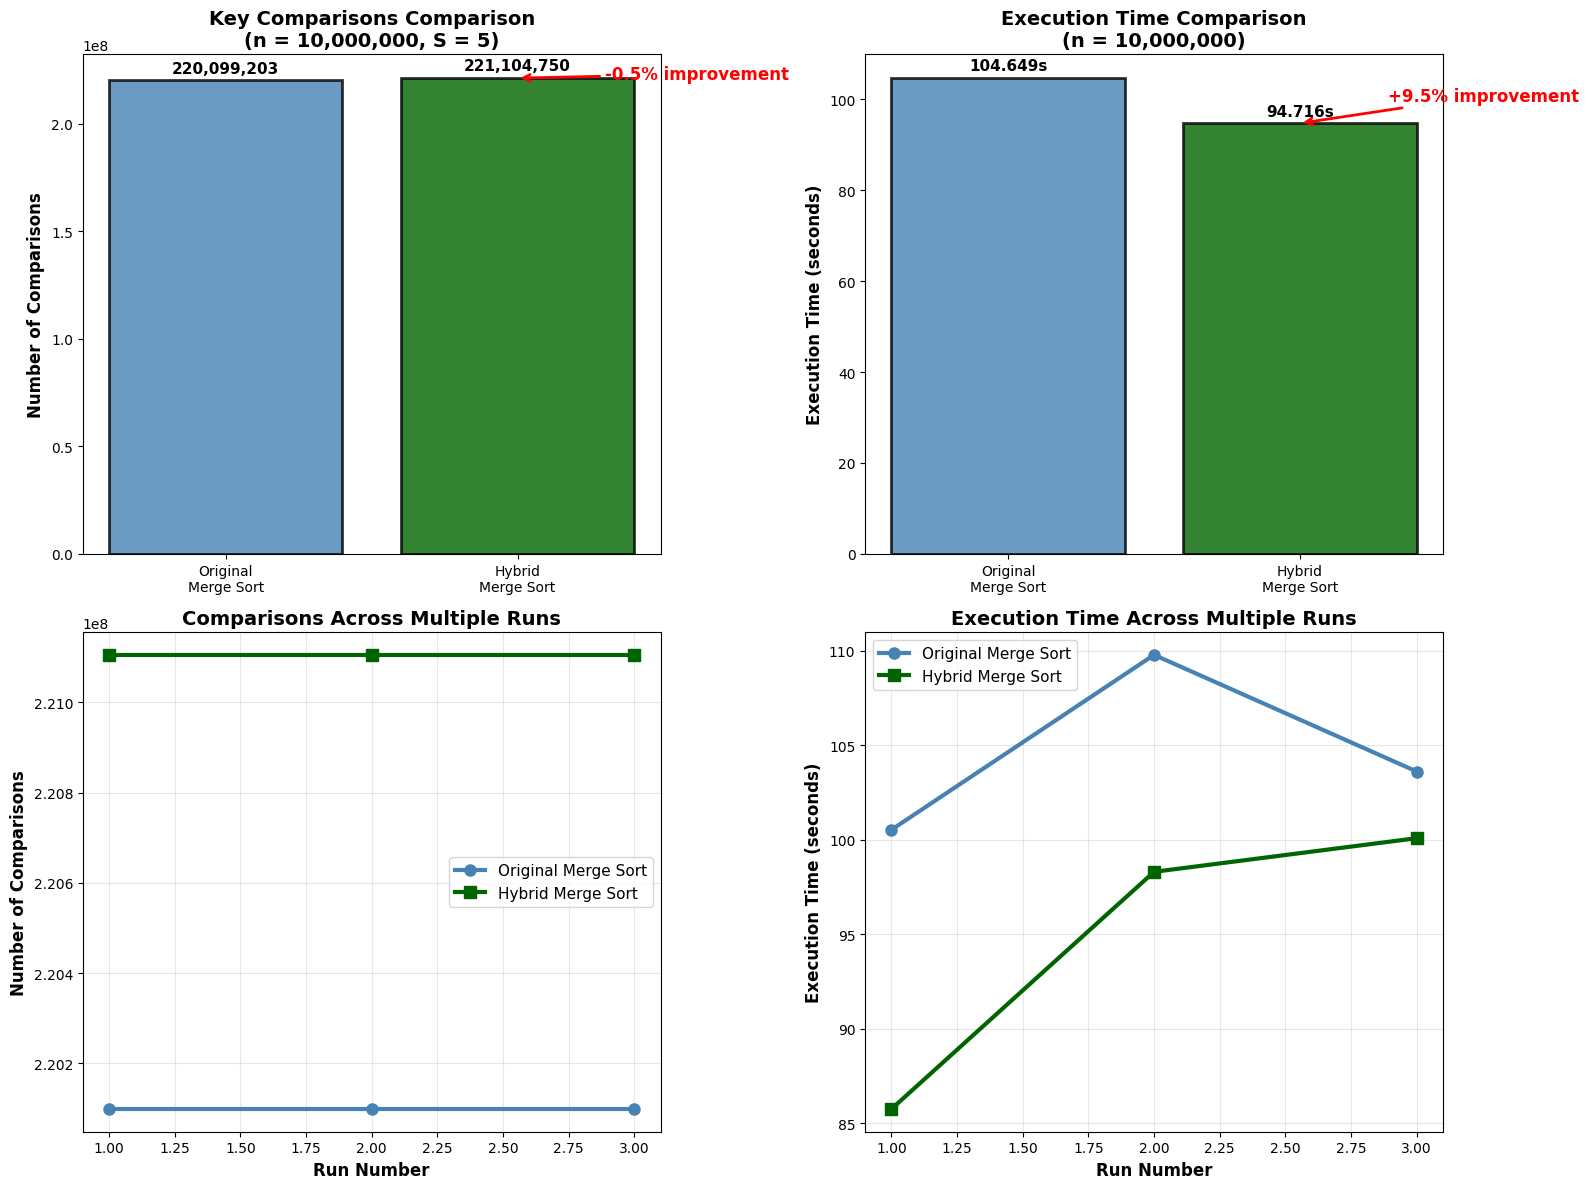

✅ COMPARISON COMPLETED SUCCESSFULLY!
📊 Check the generated plots for detailed visual analysis.


({'merge_sort': {'comparisons': [220099203, 220099203, 220099203],
   'times': [100.53359842300415, 109.79400825500488, 103.61930799484253]},
  'hybrid_sort': {'comparisons': [221104750, 221104750, 221104750],
   'times': [85.75193619728088, 98.30810523033142, 100.088782787323]}},
 {'merge_sort_avg': {'comparisons': 220099203, 'time': 104.64897155761719},
  'hybrid_sort_avg': {'comparisons': 221104750, 'time': 94.71627473831177},
  'improvements': {'comparisons': -0.4568608092597228,
   'time': 9.491442363422289},
  'theoretical': 232534966.64211535})

In [78]:
run_complete_comparison()